In [1]:
import pandas as pd


In [2]:
# Load the datasets
ratings_and_sentiments = pd.read_csv('ratings_and_sentiments.csv', encoding='ISO-8859-1')
raw_yelp_review_data = pd.read_csv('raw_yelp_review_data.csv', encoding='ISO-8859-1')
sentiments_by_shop = pd.read_csv('sentiments_by_shop.csv', encoding='ISO-8859-1')

In [3]:
# Display basic information about the datasets
ratings_and_sentiments_info = ratings_and_sentiments.info()
raw_yelp_review_data_info = raw_yelp_review_data.info()
sentiments_by_shop_info = sentiments_by_shop.info()

ratings_and_sentiments_info, raw_yelp_review_data_info, sentiments_by_shop_info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7621 entries, 0 to 7620
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   coffee_shop_name  7616 non-null   object 
 1   review_text       7616 non-null   object 
 2   rating            7616 non-null   object 
 3   num_rating        7616 non-null   float64
 4   cat_rating        7616 non-null   object 
 5   bool_HIGH         7616 non-null   float64
 6   overall_sent      7616 non-null   float64
 7   vibe_sent         4507 non-null   object 
 8   tea_sent          7616 non-null   float64
 9   service_sent      7616 non-null   float64
 10  seating_sent      7616 non-null   float64
 11  price_sent        7616 non-null   float64
 12  parking_sent      7616 non-null   object 
 13  location_sent     7616 non-null   float64
 14  alcohol_sent      7616 non-null   float64
 15  coffee_sent       7616 non-null   object 
 16  food_sent         7616 non-null   object 


(None, None, None)

In [4]:
# Merging the datasets on the 'coffee_shop_name' column
merged_data = pd.merge(ratings_and_sentiments, raw_yelp_review_data, on='coffee_shop_name', how='outer')
merged_data = pd.merge(merged_data, sentiments_by_shop, on='coffee_shop_name', how='outer')

# Displaying the first few rows to understand the merged structure
merged_data.head()

,coffee_shop_name,review_text,rating_x,num_rating,cat_rating,bool_HIGH,overall_sent,vibe_sent,tea_sent,service_sent,...,internet,food,alcohol,seating,service,parking,location,local,price,hours
0,Alta's Cafe,10/14/2016 1 check-in I'll start by saying I ...,4.0 star rating,4.0,HIGH,1.0,-2.0,NaN,0.0,0.0,...,0.0,0.18,0.19,0.35,0.35,-0.01,0.17,0.03,0.0,0.08
1,Alta's Cafe,10/9/2016 Love Alta's. Great spot to stop if ...,4.0 star rating,4.0,HIGH,1.0,2.0,NaN,0.0,0.0,...,0.0,0.18,0.19,0.35,0.35,-0.01,0.17,0.03,0.0,0.08
2,Alta's Cafe,9/12/2016 This place is great if the weather ...,4.0 star rating,4.0,HIGH,1.0,1.0,NaN,0.0,0.0,...,0.0,0.18,0.19,0.35,0.35,-0.01,0.17,0.03,0.0,0.08
3,Alta's Cafe,9/2/2016 1 check-in Wow - a hidden gem. Alta...,5.0 star rating,5.0,HIGH,1.0,1.0,NaN,0.0,0.0,...,0.0,0.18,0.19,0.35,0.35,-0.01,0.17,0.03,0.0,0.08
4,Alta's Cafe,11/30/2016 There are few places on Town Lake ...,1.0 star rating,1.0,LOW,0.0,-2.0,NaN,0.0,-1.0,...,0.0,0.18,0.19,0.35,0.35,-0.01,0.17,0.03,0.0,0.08


In [5]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 845005 entries, 0 to 845004
Data columns (total 37 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   coffee_shop_name  845000 non-null  object 
 1   review_text       843409 non-null  object 
 2   rating_x          843409 non-null  object 
 3   num_rating        843409 non-null  float64
 4   cat_rating        843409 non-null  object 
 5   bool_HIGH         843409 non-null  float64
 6   overall_sent      843409 non-null  float64
 7   vibe_sent         566884 non-null  object 
 8   tea_sent          843409 non-null  float64
 9   service_sent      843409 non-null  float64
 10  seating_sent      843409 non-null  float64
 11  price_sent        843409 non-null  float64
 12  parking_sent      843409 non-null  object 
 13  location_sent     843409 non-null  float64
 14  alcohol_sent      843409 non-null  float64
 15  coffee_sent       843409 non-null  object 
 16  food_sent         84

In [6]:
# Remove duplicate rows
merged_data.drop_duplicates(inplace=True)
merged_data.head()

,coffee_shop_name,review_text,rating_x,num_rating,cat_rating,bool_HIGH,overall_sent,vibe_sent,tea_sent,service_sent,...,internet,food,alcohol,seating,service,parking,location,local,price,hours
0,Alta's Cafe,10/14/2016 1 check-in I'll start by saying I ...,4.0 star rating,4.0,HIGH,1.0,-2.0,NaN,0.0,0.0,...,0.0,0.18,0.19,0.35,0.35,-0.01,0.17,0.03,0.0,0.08
1,Alta's Cafe,10/9/2016 Love Alta's. Great spot to stop if ...,4.0 star rating,4.0,HIGH,1.0,2.0,NaN,0.0,0.0,...,0.0,0.18,0.19,0.35,0.35,-0.01,0.17,0.03,0.0,0.08
2,Alta's Cafe,9/12/2016 This place is great if the weather ...,4.0 star rating,4.0,HIGH,1.0,1.0,NaN,0.0,0.0,...,0.0,0.18,0.19,0.35,0.35,-0.01,0.17,0.03,0.0,0.08
3,Alta's Cafe,9/2/2016 1 check-in Wow - a hidden gem. Alta...,5.0 star rating,5.0,HIGH,1.0,1.0,NaN,0.0,0.0,...,0.0,0.18,0.19,0.35,0.35,-0.01,0.17,0.03,0.0,0.08
4,Alta's Cafe,11/30/2016 There are few places on Town Lake ...,1.0 star rating,1.0,LOW,0.0,-2.0,NaN,0.0,-1.0,...,0.0,0.18,0.19,0.35,0.35,-0.01,0.17,0.03,0.0,0.08


In [7]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 594775 entries, 0 to 845000
Data columns (total 37 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   coffee_shop_name  594774 non-null  object 
 1   review_text       593183 non-null  object 
 2   rating_x          593183 non-null  object 
 3   num_rating        593183 non-null  float64
 4   cat_rating        593183 non-null  object 
 5   bool_HIGH         593183 non-null  float64
 6   overall_sent      593183 non-null  float64
 7   vibe_sent         366658 non-null  object 
 8   tea_sent          593183 non-null  float64
 9   service_sent      593183 non-null  float64
 10  seating_sent      593183 non-null  float64
 11  price_sent        593183 non-null  float64
 12  parking_sent      593183 non-null  object 
 13  location_sent     593183 non-null  float64
 14  alcohol_sent      593183 non-null  float64
 15  coffee_sent       593183 non-null  object 
 16  food_sent         593183 

In [8]:
# Generate and display summary statistics directly
summary_statistics = merged_data.describe(include='all')
print("Summary Statistics for Cleaned Data:")
print(summary_statistics)

Summary Statistics for Cleaned Data:
       coffee_shop_name                                        review_text  \
count            594774                                             593183   
unique               97                                               6915   
top       Epoch Coffee    12/20/2013 21 check-ins ROTD 4/28/2014 This r...   
freq              60000                                                400   
mean                NaN                                                NaN   
std                 NaN                                                NaN   
min                 NaN                                                NaN   
25%                 NaN                                                NaN   
50%                 NaN                                                NaN   
75%                 NaN                                                NaN   
max                 NaN                                                NaN   

                 rating_x 

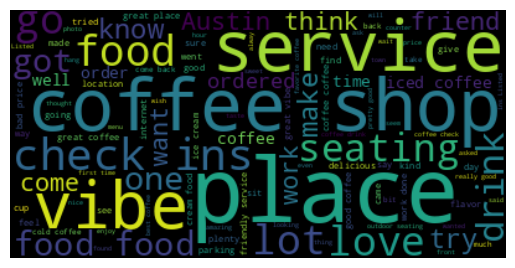

In [10]:
# prompt: word cloud for the dataframe

# Install wordcloud if not already installed
!pip install wordcloud

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming 'merged_data' is your DataFrame and 'review_text' is the column with the review text
text = " ".join(review for review in merged_data.review_text.astype(str))

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [11]:
# prompt: do sentiment analysis using nlp

!pip install nltk

import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Function to analyze sentiment of a text
def analyze_sentiment(text):
  scores = analyzer.polarity_scores(text)
  compound_score = scores['compound']

  if compound_score >= 0.05:
    return 'Positive'
  elif compound_score <= -0.05:
    return 'Negative'
  else:
    return 'Neutral'

# Apply sentiment analysis to the 'review_text' column
merged_data['sentiment'] = merged_data['review_text'].astype(str).apply(analyze_sentiment)

# Display the updated DataFrame with sentiment analysis
print(merged_data[['review_text', 'sentiment']].head())

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


                                         review_text sentiment
0   10/14/2016 1 check-in I'll start by saying I ...  Negative
1   10/9/2016 Love Alta's. Great spot to stop if ...  Positive
2   9/12/2016 This place is great if the weather ...  Positive
3   9/2/2016 1 check-in Wow - a hidden gem.  Alta...  Positive
4   11/30/2016 There are few places on Town Lake ...  Positive


In [12]:
# prompt: generate summary for the above sentiment analysis

# Analyze the overall sentiment distribution
sentiment_counts = merged_data['sentiment'].value_counts()
print("\nOverall Sentiment Distribution:")
print(sentiment_counts)

# Analyze sentiment by coffee shop (if applicable)
sentiment_by_shop = merged_data.groupby('coffee_shop_name')['sentiment'].value_counts().unstack().fillna(0)
print("\nSentiment Distribution by Coffee Shop:")
print(sentiment_by_shop)

# Generate a summary of the analysis
print("\nSentiment Analysis Summary:")
print("-" * 30)
print("The analysis of coffee shop reviews reveals the following:")
print(f"- The overall sentiment distribution is as follows: {sentiment_counts}")
print("- Further analysis can be done to identify specific shops with predominantly positive or negative reviews.")
print("- Additionally, this information can be used to understand customer preferences for various shops based on the sentiments expressed in their reviews.")

# You can add more summary insights based on your specific needs and dataset characteristics.


Overall Sentiment Distribution:
sentiment
Positive    548831
Negative     40393
Neutral       5551
Name: count, dtype: int64

Sentiment Distribution by Coffee Shop:
sentiment                     Negative  Neutral  Positive
coffee_shop_name                                         
Alta's Cafe                       10.0      1.0      89.0
Altaâs Cafe                      0.0    100.0       0.0
Anderson's Coffee Company          3.0      1.0      96.0
Andersonâs Coffee Company        0.0    100.0       0.0
Apanas Coffee & Beer             472.0      0.0   13452.0
...                                ...      ...       ...
Thunderbird Coffee               700.0      0.0    9300.0
Trianon Coffee                   588.0      0.0    9016.0
Tuscany At 360                    99.0     33.0     957.0
Venezia Italian Gelato           200.0      0.0   19800.0
Vintage Heart Coffee               0.0      0.0   10000.0

[97 rows x 3 columns]

Sentiment Analysis Summary:
----------------------------